In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from warnings import filterwarnings
filterwarnings('ignore')

**데이터불러오기 및 데이터 통합**

In [2]:
new_path = os.path.join(os.getcwd(),'data_Xentech_copy')
new_path

f_lists = os.listdir(new_path)
print("File Lists : ", f_lists)

File Lists :  ['data-2022.09.06.csv', 'data-2022.09.07.csv', 'data-2022.09.08.csv', 'data-2022.09.09.csv', 'data-2022.09.10.csv', 'data-2022.09.13.csv', 'data-2022.09.14.csv', 'data-2022.09.15.csv', 'data-2022.09.16.csv', 'data-2022.09.17.csv', 'data-2022.09.23.csv', 'data-2022.09.24.csv', 'data-2022.09.27.csv', 'data-2022.09.28.csv', 'data-2022.09.29.csv', 'data-2022.09.30.csv', 'data-2022.10.01.csv', 'data-2022.10.05.csv', 'data-2022.10.06.csv', 'data-2022.10.07.csv', 'data-2022.10.08.csv', 'data-2022.10.12.csv', 'data-2022.10.13.csv', 'data-2022.10.14.csv', 'data-2022.10.15.csv', 'data-2022.10.18.csv', 'data-2022.10.19.csv', 'data-2022.10.20.csv', 'data-2022.10.21.csv', 'data-2022.10.22.csv', 'data-2022.10.25.csv', 'data-2022.10.26.csv', 'data-2022.10.27.csv', 'Error Lot list.csv']


In [3]:
dataList=list()
cnt = 0

for pth in glob.glob(new_path+'/*')[:-1]:
    origin = pd.read_csv(pth,index_col=False)
    origin['Date'] = "-".join(pth.split('-')[-1].split(".")[:-1])
    cnt = cnt+len(origin)
    dataList.append(origin)

CatList=pd.concat(dataList,axis=0,ignore_index=True)
CatList

,Index,Lot,Time,pH,Temp,Current,Date
0,1,1,오후 4:29:15.0,10.37,42.87,7.34,2022-09-06
1,2,1,오후 4:29:20.0,10.90,42.70,8.26,2022-09-06
2,3,1,오후 4:29:25.0,9.61,42.37,8.46,2022-09-06
3,4,1,오후 4:29:30.0,10.32,45.85,8.04,2022-09-06
4,5,1,오후 4:29:35.0,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...,...,...
50089,1514,22,오후 6:39:05.9,9.79,43.52,8.55,2022-10-27
50090,1515,22,오후 6:39:10.9,9.53,44.44,7.36,2022-10-27
50091,1516,22,오후 6:39:15.9,9.86,46.54,8.15,2022-10-27
50092,1517,22,오후 6:39:20.9,10.52,47.88,7.97,2022-10-27


In [4]:
df = CatList.drop(['Index','Time'], axis=1, inplace=False)
df

,Lot,pH,Temp,Current,Date
0,1,10.37,42.87,7.34,2022-09-06
1,1,10.90,42.70,8.26,2022-09-06
2,1,9.61,42.37,8.46,2022-09-06
3,1,10.32,45.85,8.04,2022-09-06
4,1,10.36,44.18,7.23,2022-09-06
...,...,...,...,...,...
50089,22,9.79,43.52,8.55,2022-10-27
50090,22,9.53,44.44,7.36,2022-10-27
50091,22,9.86,46.54,8.15,2022-10-27
50092,22,10.52,47.88,7.97,2022-10-27


In [5]:
df.shape

(50094, 5)

In [6]:
df.describe()

,Lot,pH,Temp,Current
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,11.500000,10.273346,45.023847,7.974549
std,6.344352,0.453278,1.661687,0.601907
min,1.000000,9.510000,42.010000,5.510000
25%,6.000000,9.900000,43.670000,7.500000
50%,11.500000,10.260000,45.020000,7.990000
75%,17.000000,10.630000,46.360000,8.470000
max,22.000000,11.990000,51.980000,8.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50094 entries, 0 to 50093
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lot      50094 non-null  int64  
 1   pH       50094 non-null  float64
 2   Temp     50094 non-null  float64
 3   Current  50094 non-null  float64
 4   Date     50094 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df.isnull().sum()

Lot        0
pH         0
Temp       0
Current    0
Date       0
dtype: int64

In [9]:
lot_lists = df['Lot'].unique()
lot_lists

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22], dtype=int64)

In [10]:
d_lists = df['Date'].unique()
d_lists

array(['2022-09-06', '2022-09-07', '2022-09-08', '2022-09-09',
       '2022-09-10', '2022-09-13', '2022-09-14', '2022-09-15',
       '2022-09-16', '2022-09-17', '2022-09-23', '2022-09-24',
       '2022-09-27', '2022-09-28', '2022-09-29', '2022-09-30',
       '2022-10-01', '2022-10-05', '2022-10-06', '2022-10-07',
       '2022-10-08', '2022-10-12', '2022-10-13', '2022-10-14',
       '2022-10-15', '2022-10-18', '2022-10-19', '2022-10-20',
       '2022-10-21', '2022-10-22', '2022-10-25', '2022-10-26',
       '2022-10-27'], dtype=object)

In [11]:
df_er = pd.read_csv(glob.glob(new_path+'/*')[-1],index_col=False)
df_er

,Index,Date,LoT,LoT2
0,1,2022-09-06,NaN,NaN
1,2,2022-09-07,13.0,NaN
2,3,2022-09-08,NaN,NaN
3,4,2022-09-09,NaN,NaN
4,5,2022-09-10,NaN,NaN
5,6,2022-09-13,NaN,NaN
6,7,2022-09-14,5.0,NaN
7,8,2022-09-15,5.0,NaN
8,9,2022-09-16,NaN,NaN
9,10,2022-09-17,NaN,NaN


In [12]:
er_drop = df_er.dropna(thresh=3, axis=0)
lot_er_list = er_drop['LoT'].unique()
lot_er_list

array([13.,  5.,  9.,  8., 17., 19., 14.,  1., 15.])

In [13]:
d_er_list = er_drop['Date'].unique()
d_er_list

array(['2022-09-07', '2022-09-14', '2022-09-15', '2022-09-23',
       '2022-09-29', '2022-10-01', '2022-10-05', '2022-10-06',
       '2022-10-08', '2022-10-20', '2022-10-22', '2022-10-25',
       '2022-10-26'], dtype=object)

In [14]:
df_total = pd.DataFrame(columns=['pH','Temp','Current','NG'])

In [15]:
for d in d_lists:
    for lot in lot_lists:
        tmp = df[(df['Date']==d)&(df['Lot']==lot)]
        tmp = tmp[['pH', 'Temp','Current']]
        er_df = er_drop[(er_drop['Date']==d)&
                              ((er_drop['LoT']==lot)|(er_drop['LoT2']==lot))]
        len_error = len(er_df)
        if len_error>0:
            trr = np.full((tmp['pH'].shape), 1)
        else:
            trr = np.full((tmp['pH'].shape), 0)
        tmp['NG'] = trr
        df_total = df_total.append(tmp)
df_total =  df_total.apply(pd.to_numeric)
df_total

,pH,Temp,Current,NG
0,10.37,42.87,7.34,0
1,10.90,42.70,8.26,0
2,9.61,42.37,8.46,0
3,10.32,45.85,8.04,0
4,10.36,44.18,7.23,0
...,...,...,...,...
50089,9.79,43.52,8.55,0
50090,9.53,44.44,7.36,0
50091,9.86,46.54,8.15,0
50092,10.52,47.88,7.97,0


In [16]:
df_total.describe()

,pH,Temp,Current,NG
count,50094.000000,50094.000000,50094.000000,50094.000000
mean,10.273346,45.023847,7.974549,0.020661
std,0.453278,1.661687,0.601907,0.142249
min,9.510000,42.010000,5.510000,0.000000
25%,9.900000,43.670000,7.500000,0.000000
50%,10.260000,45.020000,7.990000,0.000000
75%,10.630000,46.360000,8.470000,0.000000
max,11.990000,51.980000,8.990000,1.000000


**데이터 시각화**

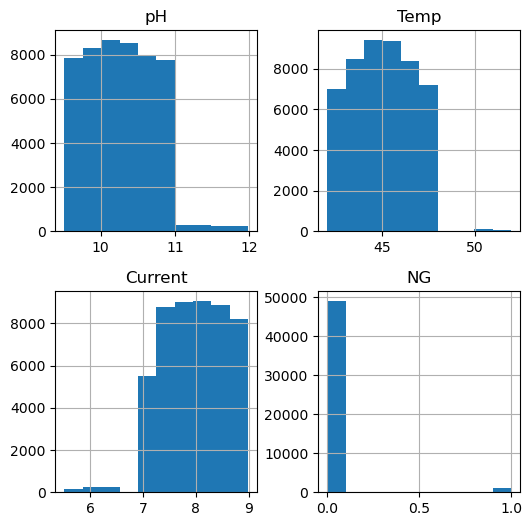

In [17]:
df_total.hist(figsize=(6,6))
plt.show()

**데이터간 상관관계 확인**

In [18]:
df_total.corr()

,pH,Temp,Current,NG
pH,1.000000,0.001407,-0.026063,0.026743
Temp,0.001407,1.000000,-0.000786,0.011250
Current,-0.026063,-0.000786,1.000000,-0.014376
NG,0.026743,0.011250,-0.014376,1.000000


<Axes: >

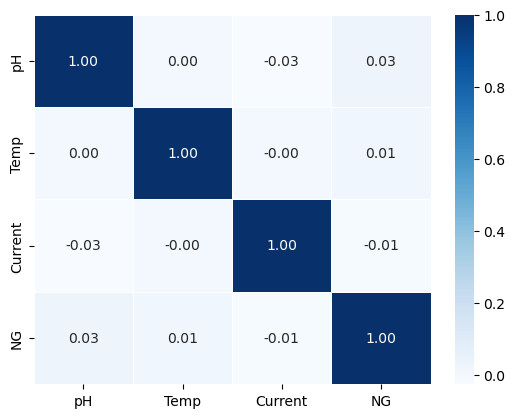

In [19]:
sns.heatmap(df_total.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [20]:
corr_matrix = df_total.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

**데이터 전처리**

In [21]:
df_total_copy = df_total.copy()

In [22]:
df_total_copy["ratio"] = df_total["pH"] / df_total["Current"]

In [23]:
corr_matrix = df_total_copy.corr()
corr_matrix["NG"].sort_values(ascending=False)

NG         1.000000
ratio      0.028735
pH         0.026743
Temp       0.011250
Current   -0.014376
Name: NG, dtype: float64

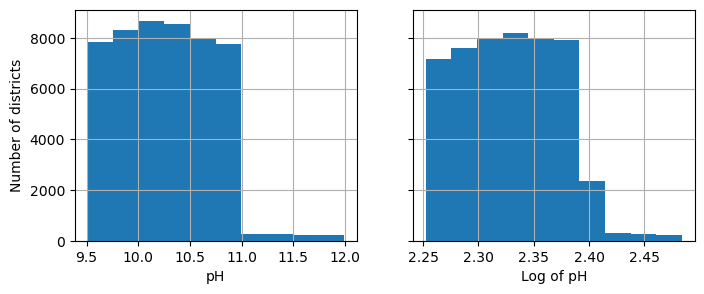

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["pH"].hist(ax=axs[0], bins=10)
df_total["pH"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("pH")
axs[1].set_xlabel("Log of pH")
axs[0].set_ylabel("Number of districts")
plt.show()

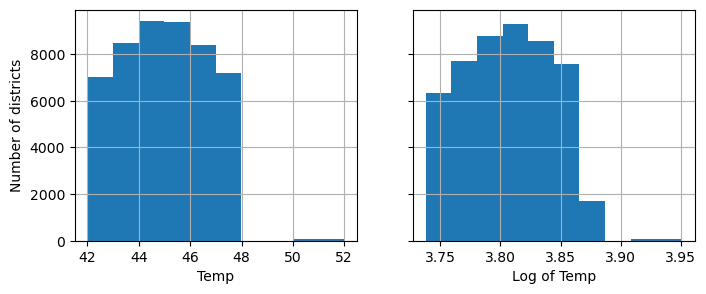

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
df_total["Temp"].hist(ax=axs[0], bins=10)
df_total["Temp"].apply(np.log).hist(ax=axs[1], bins=10)
axs[0].set_xlabel("Temp")
axs[1].set_xlabel("Log of Temp")
axs[0].set_ylabel("Number of districts")
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

df_total_data = df_total.drop(['NG'], axis=1, inplace=False)
scaler = StandardScaler()
df_total_scale = scaler.fit_transform(df_total_data)

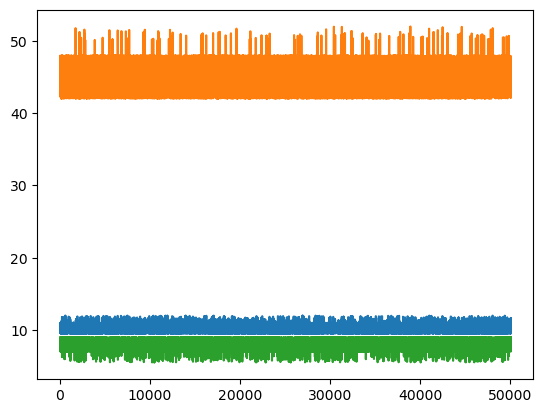

In [27]:
plt.plot(df_total_data)
plt.show()

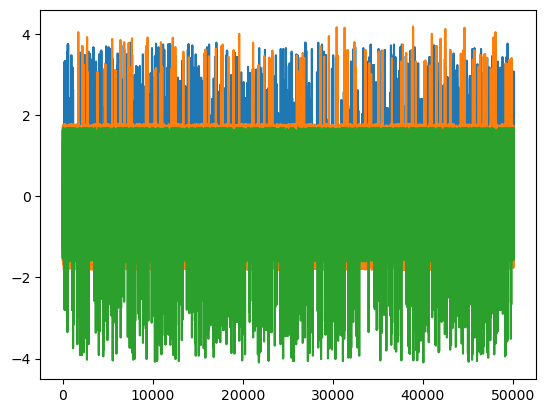

In [28]:
plt.plot(df_total_scale)
plt.show()

**데이터 분할**

In [29]:
train_data, test_data = train_test_split(df_total, test_size=0.2, stratify = df_total["NG"], random_state=69)

In [30]:
train_data

,pH,Temp,Current,NG
36673,9.70,43.14,8.28,0
19849,10.36,46.09,7.73,0
37067,10.22,45.88,7.16,0
29426,10.19,45.08,8.68,0
22613,10.98,45.30,7.33,0
...,...,...,...,...
26040,10.94,46.33,7.27,0
41471,9.57,44.97,7.12,0
24586,9.66,46.97,7.74,0
44457,9.95,46.63,7.80,0


In [31]:
def acceration_cat_proportions(data):
    return data["NG"].value_counts() / len(data)

train_data_nospl, test_data_nospl = train_test_split(df_total, test_size=0.2, random_state=69)

compare_props = pd.DataFrame({
    "Overall %": acceration_cat_proportions(df_total),
    "Stratified %": acceration_cat_proportions(test_data),
    "Random %": acceration_cat_proportions(test_data_nospl),
}).sort_index()
compare_props.index.name = "NG"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
NG,,,,,
0,97.93,97.93,97.93,0.0,0.0
1,2.07,2.07,2.07,-0.0,-0.0


In [32]:
train_data

,pH,Temp,Current,NG
36673,9.70,43.14,8.28,0
19849,10.36,46.09,7.73,0
37067,10.22,45.88,7.16,0
29426,10.19,45.08,8.68,0
22613,10.98,45.30,7.33,0
...,...,...,...,...
26040,10.94,46.33,7.27,0
41471,9.57,44.97,7.12,0
24586,9.66,46.97,7.74,0
44457,9.95,46.63,7.80,0


In [33]:
test_data

,pH,Temp,Current,NG
33144,9.68,42.70,8.37,0
41550,10.68,47.56,7.56,0
9000,10.93,46.99,8.49,0
8929,10.62,42.53,7.72,0
39800,10.27,45.65,8.47,0
...,...,...,...,...
43489,10.49,46.65,7.87,0
47272,10.63,42.01,8.58,0
25708,9.77,44.87,8.23,0
19330,9.78,46.41,8.88,0


In [34]:
X_train = train_data[['pH','Temp','Current']]
Y_train = train_data[['NG']]
X_test = test_data[['pH','Temp','Current']]
Y_test = test_data[['NG']]

**파이프라인 구성**

In [35]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        StandardScaler())

log_pipeline = make_pipeline(
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

log_pipeline

Pipeline(steps=[('functiontransformer',
                 FunctionTransformer(feature_names_out='one-to-one',
                                     func=<ufunc 'log'>)),
                ('standardscaler', StandardScaler())])

In [36]:
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer([
    ("pH_per_Current", ratio_pipeline(), ["pH", "Current"]),
    ("log", log_pipeline, ['pH','Temp'])], 
    remainder=StandardScaler()) 

preprocessing

ColumnTransformer(remainder=StandardScaler(),
                  transformers=[('pH_per_Current',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['pH', 'Current']),
                                ('log',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['pH', 'Temp'])])

**모델학습**

1. 로지스틱 회귀

In [37]:
from sklearn.linear_model import LogisticRegression

logistic_reg = make_pipeline(preprocessing, LogisticRegression())
logistic_reg.fit(X_train, Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Temp'])])),
                ('logisticregression', LogisticRegression())])

2. Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier 

classifier = make_pipeline(preprocessing, DecisionTreeClassifier())
classifier.fit(X_train,Y_train) 

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Temp'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

3. RandomForest

[0.013100436681222707, 0.08333333333333333, 0.04838709677419355, 0.09090909090909091, 0.05, 0.1111111111111111, 0.06451612903225806, 0.11764705882352941, 0.08333333333333333, 0.14285714285714285, 0.11764705882352941, 0.09090909090909091, 0.11764705882352941, 0.18181818181818182, 0.13333333333333333, 0.1, 0.08333333333333333, 0.1111111111111111, 0.07692307692307693]


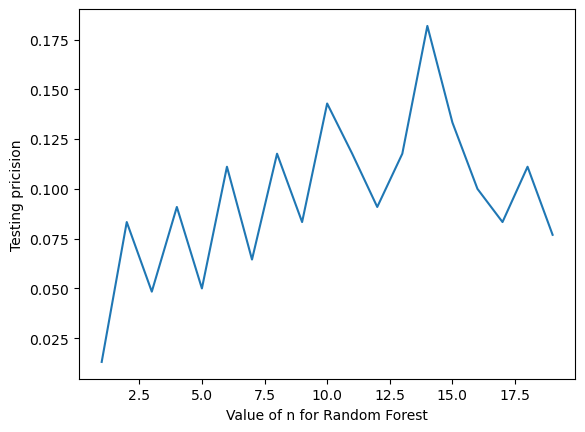

In [39]:
from sklearn.ensemble import RandomForestClassifier 

random_classifier = make_pipeline(preprocessing, RandomForestClassifier())
n_range = range(1, 20) 
pricision_scores = []

for n in n_range:
    random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=n))
    random_classifier.fit(X_train,Y_train)
    predict_random_classifier = random_classifier.predict(X_test)
    pricision_scores.append(precision_score(Y_test, predict_random_classifier)) 
print(pricision_scores)

import matplotlib.pyplot as plt
plt.plot(n_range, pricision_scores)
plt.xlabel('Value of n for Random Forest')
plt.ylabel('Testing pricision')
plt.show()

In [40]:
# n_estimators=14 파라미터 확정
random_classifier = make_pipeline(preprocessing, RandomForestClassifier(random_state=0, n_estimators=14))
random_classifier.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Temp'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=14, random_state=0))])

4. SVM

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_model = SVC()
param_grid = {'C': [0.1,0.8,1,1.2,1.4], 'kernel':['rbf'], 'gamma' :[0.1,0.8,1,1.2,1.4]}

In [42]:
from sklearn.model_selection import KFold

kf = KFold(random_state = 30, n_splits = 10, shuffle = True)

grid_search = GridSearchCV(estimator=svm_model, param_grid =param_grid, cv = kf, verbose = 2)
grid_result = grid_search.fit(X_train, Y_train)

best_params = grid_result.best_params_
best_score = grid_result.best_score_
print(f"Best: {best_score} using {best_params}" )

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   3.3s
[CV] END .......................C=0.1, gamma=0.8, kernel=rbf; total time=   3.9s
[CV] END .......................C=0.1, gamma=0

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.6s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   3.5s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=  19.3s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=  12.7s
[CV] END .........................C=1, gamma=0.8, kernel=rbf; total time=  18.0s
[CV] END ...................

[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   4.2s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   3.7s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   3.8s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   4.4s
[CV] END .......................C=1.4, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .......................C=1.4, gamma=0.8, kernel=rbf; total time=  23.7s
[CV] END .......................C=1.4, gamma=0.8, kernel=rbf; total time=  18.9s
[CV] END .......................C=1.4, gamma=0.8, kernel=rbf; total time=  19.7s
[CV] END .......................C=1.4, gamma=0.8, kernel=rbf; total time=  19.6s
[CV] END .......................C=1.4, gamma=0.8, kernel=rbf; total time=  18.6s
[CV] END ...................

In [43]:
# 파라미터 확정
svm_classifier = make_pipeline(preprocessing, SVC(**best_params))
svm_classifier.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('pH_per_Current',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Current']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['pH', 'Temp'])])),
                ('svc', SVC(C=0.1, gamma=0.1))])

**모델별 성능 확인**

In [44]:
predict_logistic_reg = logistic_reg.predict(X_test)
predict_classifier = classifier.predict(X_test)
predict_random_classifier = random_classifier.predict(X_test)
predict_svm_classifier = svm_classifier.predict(X_test)

1. 로지스틱 회귀모델

Logistic Regression
precision: 0.0 recall: 0.0
F1-Score: 0.0 Accuracy: 0.979339255414712


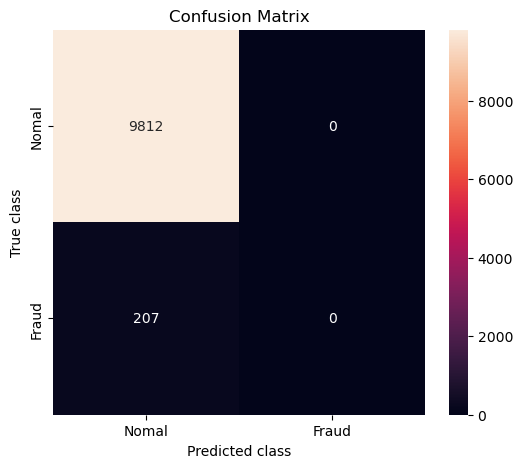

In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

result = {}

#예측도
precision_logistic_reg = precision_score(Y_test, predict_logistic_reg)
#재현율
recall_logistic_reg = recall_score(Y_test, predict_logistic_reg)
#F1 Score
f1_logistic_reg = f1_score(Y_test, predict_logistic_reg)
#정확도
acc_logistic_reg = accuracy_score(Y_test, predict_logistic_reg)
#오차 행렬
cm_logistic_reg = confusion_matrix(Y_test, predict_logistic_reg)
result['Logistic Regression'] = {'precision':precision_logistic_reg, 'recall':recall_logistic_reg, 'f1-score':f1_logistic_reg, 'accuracy':acc_logistic_reg}
print(f'Logistic Regression\nprecision: {precision_logistic_reg} recall: {recall_logistic_reg}\nF1-Score: {f1_logistic_reg} Accuracy: {acc_logistic_reg}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic_reg, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

 2. Decision Tree 모델

Decision Tree
precision: 0.023715415019762844 recall: 0.028985507246376812
F1-Score: 0.02608695652173913 Accuracy: 0.9552849585787004


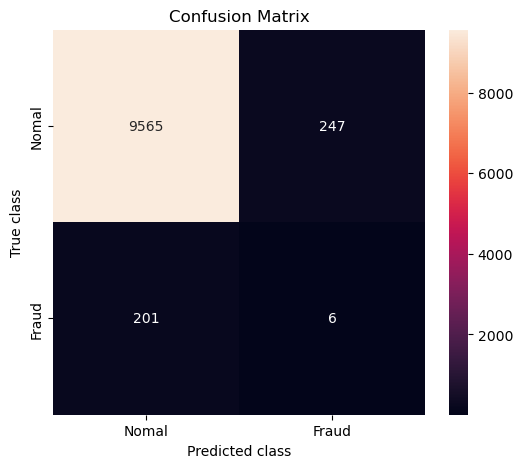

In [50]:
#예측도
precision_classifier = precision_score(Y_test, predict_classifier)
#재현율
recall_classifier = recall_score(Y_test, predict_classifier)
#F1 Score
f1_classifier = f1_score(Y_test, predict_classifier)
#정확도
acc_classifier = accuracy_score(Y_test, predict_classifier)
#오차 행렬
cm_classifier = confusion_matrix(Y_test, predict_classifier)
result['Decision Tree'] = {'precision':precision_classifier, 'recall':recall_classifier, 'f1-score':f1_classifier, 'accuracy':acc_classifier}
print(f'Decision Tree\nprecision: {precision_classifier} recall: {recall_classifier}\nF1-Score: {f1_classifier} Accuracy: {acc_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

3. Random Forest 모델

Random Forest
precision: 0.18181818181818182 recall: 0.00966183574879227
F1-Score: 0.018348623853211007 Accuracy: 0.9786405828925042


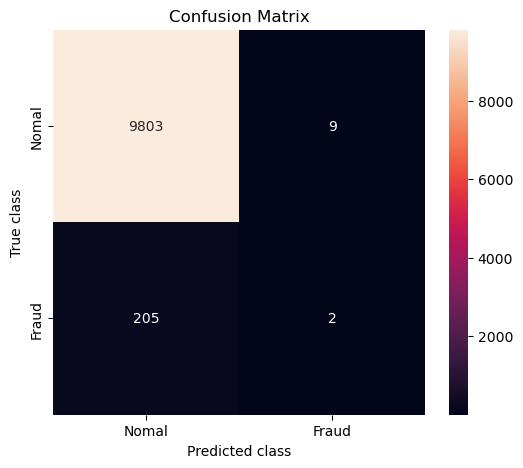

In [51]:
#예측도
precision_random_classifier = precision_score(Y_test, predict_random_classifier)
#재현율
recall_random_classifier = recall_score(Y_test, predict_random_classifier)
#F1 Score
f1_random_classifier = f1_score(Y_test, predict_random_classifier)
#정확도
acc_random_classifier = accuracy_score(Y_test, predict_random_classifier)
#오차 행렬
cm_random_classifier = confusion_matrix(Y_test, predict_random_classifier)
result['Random Forest'] = {'precision':precision_random_classifier, 'recall':recall_random_classifier, 'f1-score':f1_random_classifier, 'accuracy':acc_random_classifier}
print(f'Random Forest\nprecision: {precision_random_classifier} recall: {recall_random_classifier}\nF1-Score: {f1_random_classifier} Accuracy: {acc_random_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_random_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

4. SVM 모델

SVM
precision: 0.0 recall: 0.0
F1-Score: 0.0 Accuracy: 0.979339255414712


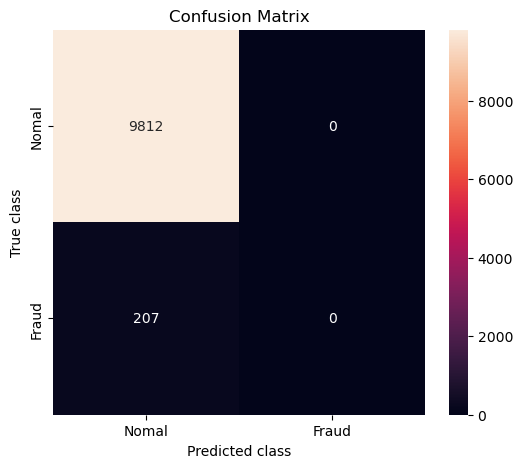

In [52]:
#예측도
precision_svm_classifier = precision_score(Y_test, predict_svm_classifier)
#재현율
recall_svm_classifier = recall_score(Y_test, predict_svm_classifier)
#F1 Score
f1_svm_classifier = f1_score(Y_test, predict_svm_classifier)
#정확도
acc_svm_classifier = accuracy_score(Y_test, predict_svm_classifier)
#오차 행렬
cm_svm_classifier = confusion_matrix(Y_test, predict_svm_classifier)
result['SVM'] = {'precision':precision_svm_classifier, 'recall':recall_svm_classifier, 'f1-score':f1_svm_classifier, 'accuracy':acc_svm_classifier}
print(f'SVM\nprecision: {precision_svm_classifier} recall: {recall_svm_classifier}\nF1-Score: {f1_svm_classifier} Accuracy: {acc_svm_classifier}')

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm_classifier, xticklabels=['Nomal', 'Fraud'], yticklabels=['Nomal', 'Fraud'], annot=True, fmt="d");
plt.title("Confusion Matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [53]:
pd.DataFrame(result).T

,precision,recall,f1-score,accuracy
Logistic Regression,0.000000,0.000000,0.000000,0.979339
Decision Tree,0.023715,0.028986,0.026087,0.955285
Random Forest,0.181818,0.009662,0.018349,0.978641
SVM,0.000000,0.000000,0.000000,0.979339
